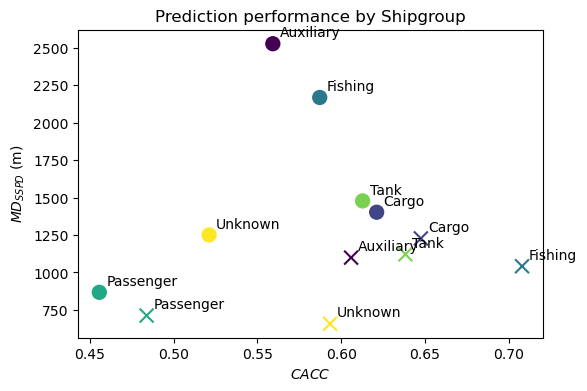

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

model = 'stavanger_mogen' #'tromso_dijkstra'

# Plot prediction performance by ship group

# Get eval data of model trained on all shiptypes and plot results
df = pd.read_csv(model+'_all_types.csv')
# drop rows where ship type is Tug
evaluation_results_meta = df[df['skipsgruppe'] != 'Tug']

# get choice accuracy and SSPD by shipgroup
sspd_by_group = evaluation_results_meta.groupby(['skipsgruppe'])['SSPD'].mean()
cacc_by_group = evaluation_results_meta.groupby(['skipsgruppe'])['choice_accuracy'].mean()

x = cacc_by_group.values
y = sspd_by_group.values
categories = sspd_by_group.index

fig, ax = plt.subplots(figsize=[6, 4])

# Scatter plot with different colors and markers for each category
scatter = ax.scatter(x, y, c=range(len(categories)), cmap='viridis', marker='o', s=100)

# Annotate each point with the ship category name
for i, category in enumerate(categories):
    ax.annotate(category, (x[i], y[i]), textcoords="offset points", xytext=(5,5), ha='left')


# Get eval data of models trained on individual shiptypes and plot results
#categories = ['Cargo', 'Tank', 'Fishing', 'Auxiliary', 'Passenger', 'Unknown']
x = []
y = []
for category in categories:
    evaluation_results_meta = pd.read_csv(model+'_'+category+'.csv')
    sspd_by_group = evaluation_results_meta['SSPD'].mean()
    cacc_by_group = evaluation_results_meta['choice_accuracy'].mean()
    x.append(cacc_by_group)
    y.append(sspd_by_group)

scatter = ax.scatter(x, y, c=range(len(categories)), cmap='viridis', marker='x', s=100)

# Annotate each point with the ship category name
for i, category in enumerate(categories):
    ax.annotate(category, (x[i], y[i]), textcoords="offset points", xytext=(5,5), ha='left')
    

#max_x_value = max(x)
#max_y_value = max(y)
#min_x_value = min(x)
#min_y_value = min(y)
#ax.set_xlim(min_x_value-0.01, max_x_value+0.01)
#ax.set_ylim(min_y_value, max_y_value+50)

ax.set_xlabel('$CACC$')
ax.set_ylabel('$MD_{SSPD}$ (m)')
plt.title('Prediction performance by Shipgroup')

plt.show()